In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [51]:
"""
Function for finding the distance in kilometers from redhook center
"""
def return_dist(lat,lon):
    from math import sin, cos, sqrt, atan2, radians

    redhook_lat, redhook_long = 40.676993,-74.012102
    lat1 = radians(lat)
    lon1 = radians(lon)
    # lat1 = radians(citibike_2019_03['start station latitude'][2])
    # lon1 = radians(citibike_2019_03['start station longitude'][2])
    lat2 = radians(redhook_lat)
    lon2 = radians(redhook_long)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return(distance)

In [52]:
"""
Function for filtering citibike data to those trips where end station or start station is in redhook 
"""
def filtered_trips(filename):
    citibike_df = pd.read_csv('citibike_data/'+filename)
    citibike_stations = citibike_df[['start station name','start station latitude','start station longitude']]
    citibike_stations.drop_duplicates(inplace=True)
    redhook_stations_list = []
    redhook_stations = pd.DataFrame(columns=['start station name','start station latitude','start station longitude'])
    for index, row in citibike_stations.iterrows():
        if (return_dist(row['start station latitude'], row['start station longitude'])<0.7):
            redhook_stations_list.append(row['start station name'])
    redhook_source_trips = citibike_df[citibike_df['start station name'].isin(redhook_stations_list)]
    redhook_dest_trips = citibike_df[citibike_df['end station name'].isin(redhook_stations_list)]
    redhook_source_trips['starttime'] = pd.to_datetime(redhook_source_trips['starttime'])
    redhook_source_trips['stoptime'] = pd.to_datetime(redhook_source_trips['stoptime'])
    redhook_dest_trips['starttime'] = pd.to_datetime(redhook_dest_trips['starttime'])
    redhook_dest_trips['stoptime'] = pd.to_datetime(redhook_dest_trips['stoptime'])
    redhook_trips = redhook_dest_trips.append(redhook_source_trips, ignore_index=True)
    return(redhook_trips)

### Reading in all citibike files and filtering out the trips that either originated or ended in redhook

In [8]:
#reading in all citibike files and filtering to redhook
citibike_201903 = filtered_trips('201903-citibike-tripdata.csv')
citibike_201902 = filtered_trips('201902-citibike-tripdata.csv')
citibike_201901 = filtered_trips('201901-citibike-tripdata.csv')
citibike_201812 = filtered_trips('201812-citibike-tripdata.csv')
citibike_201811 = filtered_trips('201811-citibike-tripdata.csv')
citibike_201810 = filtered_trips('201810-citibike-tripdata.csv')
citibike_201809 = filtered_trips('201809-citibike-tripdata.csv')
citibike_201808 = filtered_trips('201808-citibike-tripdata.csv')
citibike_201807 = filtered_trips('201807-citibike-tripdata.csv')
citibike_201806 = filtered_trips('201806-citibike-tripdata.csv')
citibike_201805 = filtered_trips('201805-citibike-tripdata.csv')
citibike_201804 = filtered_trips('201804-citibike-tripdata.csv')

C:\Users\siddh\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\siddh\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\siddh\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

### Creating a dataframe for the entire 12 month period

In [9]:
citibike_df = pd.concat([citibike_201804,citibike_201805,citibike_201806,citibike_201807,
                        citibike_201808,citibike_201809,citibike_201810,citibike_201811,
                        citibike_201812,citibike_201901,citibike_201902,citibike_201903])

In [10]:
citibike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2072,2018-04-24 09:36:33.466,2018-04-24 10:11:05.787,79.0,Franklin St & W Broadway,40.719116,-74.006667,3392.0,Commerce St & Van Brunt St,40.681212,-74.008609,17540,Subscriber,1980,1
1,1004,2018-04-11 11:21:10.033,2018-04-11 11:37:54.901,83.0,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3342.0,Pioneer St & Richards St,40.677775,-74.009461,21609,Subscriber,1988,1
2,975,2018-04-20 13:42:57.745,2018-04-20 13:59:12.887,83.0,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3347.0,Van Brunt St & Wolcott St,40.677343,-74.012751,31207,Subscriber,1987,1
3,1193,2018-04-26 20:11:56.047,2018-04-26 20:31:49.539,83.0,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3347.0,Van Brunt St & Wolcott St,40.677343,-74.012751,28966,Subscriber,1973,1
4,2729,2018-04-28 17:42:08.790,2018-04-28 18:27:38.350,120.0,Lexington Ave & Classon Ave,40.686768,-73.959282,3344.0,Pioneer St & Van Brunt St,40.679043,-74.011169,20884,Subscriber,1969,2


In [12]:
#Creating fields that are needed for grouping by month, day and hour
citibike_df['month'] = citibike_df.starttime.dt.month
citibike_df['startdate'] = citibike_df.starttime.dt.date
citibike_df['stopdate'] = citibike_df.stoptime.dt.date
citibike_df['starthour'] = citibike_df.starttime.dt.hour
citibike_df['stophour'] = citibike_df.stoptime.dt.hour
citibike_df['startday'] = citibike_df.starttime.dt.day
citibike_df['stopday'] = citibike_df.stoptime.dt.day

In [13]:
redhook_stations_list = []
for index, row in citibike_df.iterrows():
    if (return_dist(row['start station latitude'], row['start station longitude'])<0.7):
        redhook_stations_list.append(row['start station name'])
    if (return_dist(row['end station latitude'], row['end station longitude'])<0.7):
        redhook_stations_list.append(row['end station name'])

### The list of stations in redhook for verification

In [14]:
redhook_stations_list = list(set(redhook_stations_list))
redhook_stations_list

['Columbia St & Lorraine St',
 'Columbia St & W 9 St',
 'Van Brunt St & Wolcott St',
 'Commerce St & Van Brunt St',
 'Pioneer St & Van Brunt St',
 'Richards St & Delavan St',
 'Wolcott St & Dwight St',
 'Van Brunt St & Van Dyke St',
 'Pioneer St & Richards St',
 'Dwight St & Van Dyke St',
 'Coffey St & Conover St',
 'Van Dyke St & Van Brunt St',
 'Sigourney St & Columbia St']

### Seperating trips that have originated from redhook and those that end at redhook

In [15]:
#Ge
redhook_source_trips = citibike_df[citibike_df['start station name'].isin(redhook_stations_list)]
redhook_dest_trips = citibike_df[citibike_df['end station name'].isin(redhook_stations_list)]

### Observing the daily trips with source at redhook and destination at redhook 

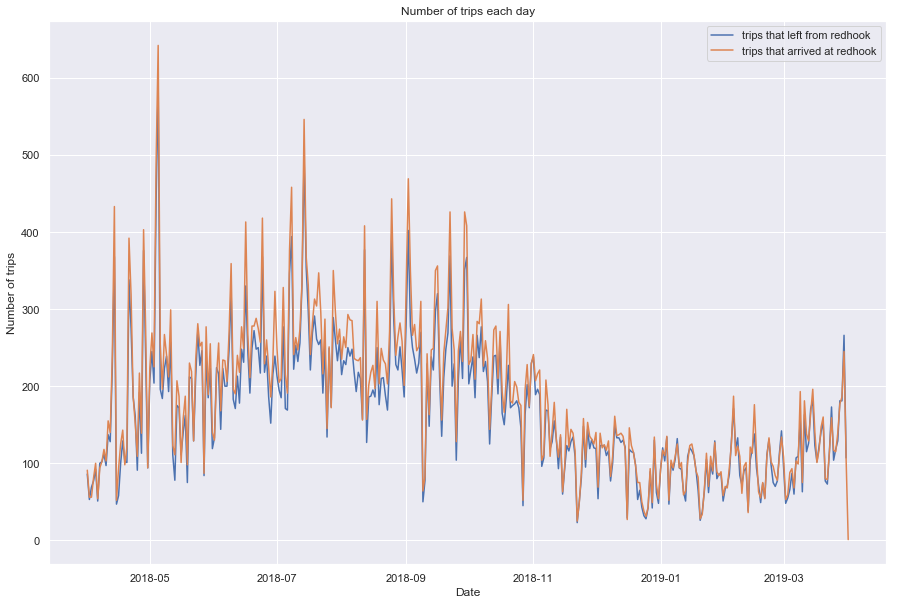

In [54]:
trips_by_month_source = redhook_source_trips.groupby('startdate').count().reset_index()
trips_by_month_dest = redhook_dest_trips.groupby('stopdate').count().reset_index()
plt.figure(figsize=(15,10))
plt.title("Number of trips each day")
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.plot(trips_by_month_source['startdate'],trips_by_month_source['tripduration'])
plt.plot(trips_by_month_dest['stopdate'],trips_by_month_dest['tripduration'])
plt.legend(['trips that left from redhook','trips that arrived at redhook'])

Here we observe that the number of trips decrease towards october (winter) and pick up closer to may(spring). We also observe the number of trips arriving and departing from redhook seem correlated.

### Now observing the distribution of trips over 24 hours with source at redhook and destination at redhook 

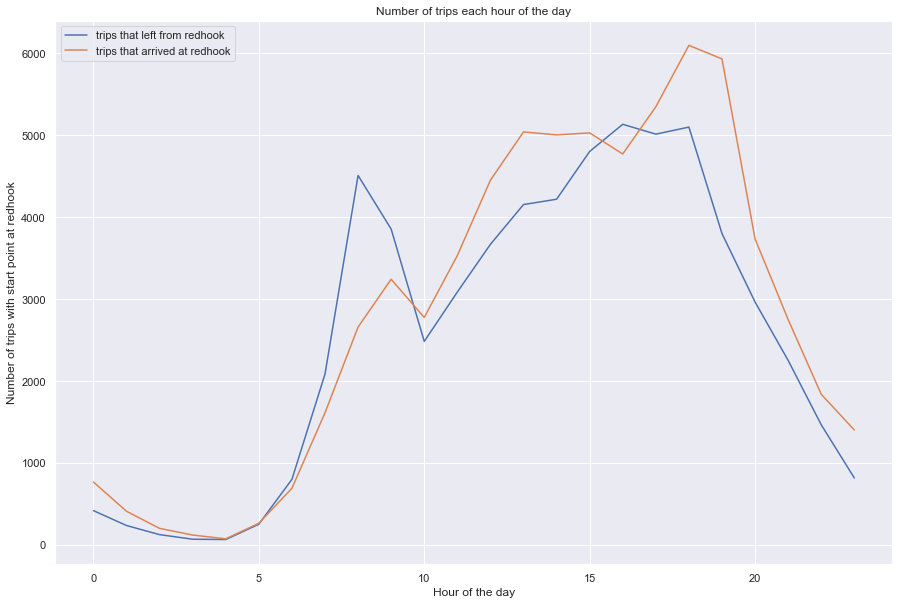

In [59]:
trips_by_hour_source = redhook_source_trips.groupby('starthour').count().reset_index()
trips_by_hour_dest = redhook_dest_trips.groupby('stophour').count().reset_index()
plt.figure(figsize=(15,10))
plt.title("Number of trips each hour of the day")
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips with start point at redhook')
plt.plot(trips_by_hour_source['starthour'],trips_by_hour_source['tripduration'])
plt.plot(trips_by_hour_dest['stophour'],trips_by_hour_dest['tripduration'])
plt.legend(['trips that left from redhook','trips that arrived at redhook'])

Here we observe there is a spike in trips leaving redhook around 8am daily and both the trips leaving and arriving at redhook increase till 7pm and then drop off.

### Finally observing the distribution of trips over 24 hours with source at redhook and destination at redhook

C:\Users\siddh\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\siddh\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


([<matplotlib.axis.XTick at 0x11984155be0>,
 <a list of 7 Text xticklabel objects>)

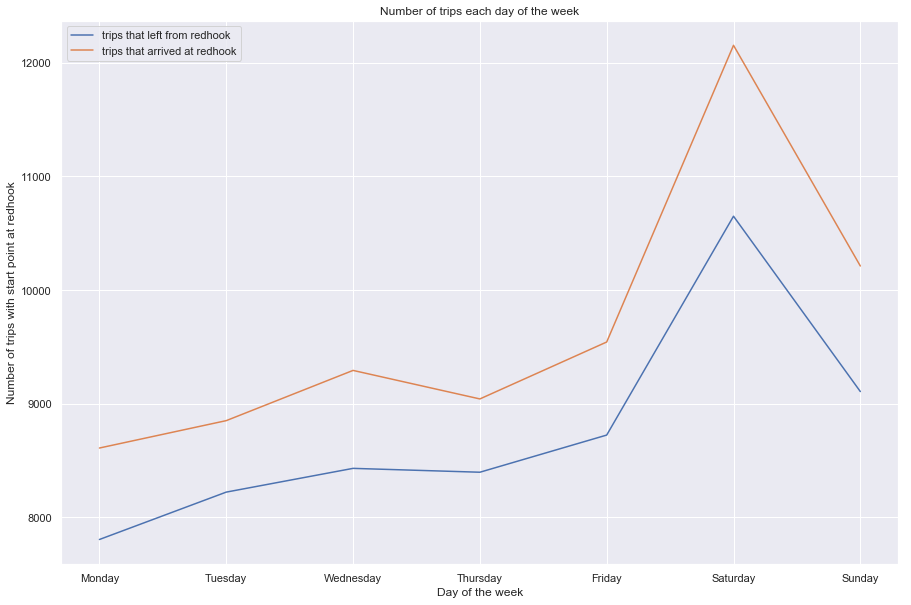

In [58]:
redhook_source_trips['dow'] = redhook_source_trips.starttime.dt.dayofweek
redhook_dest_trips['dow'] = redhook_dest_trips.starttime.dt.dayofweek
trips_by_dow_source = redhook_source_trips.groupby('dow').count().reset_index()
trips_by_dow_dest = redhook_dest_trips.groupby('dow').count().reset_index()
plt.figure(figsize=(15,10))
plt.title("Number of trips each day of the week")
plt.xlabel('Day of the week')
plt.ylabel('Number of trips with start point at redhook')
plt.plot(trips_by_dow_source['dow'],trips_by_dow_source['tripduration'])
plt.plot(trips_by_dow_dest['dow'],trips_by_dow_dest['tripduration'])
plt.legend(['trips that left from redhook','trips that arrived at redhook'])
plt.xticks(np.arange(7),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

There is an apparent spike in number of trips on saturdays.

One intersting observation from the timeseries plots above was how similar the counts of trips leaving and arriving at redhook were. This led me to believe that many of the trips start and end within redhook. 

In [20]:
redhook_source_trips.shape

(61329, 22)

In [21]:
redhook_dest_trips.shape

(67698, 22)

In [33]:
redhook_source_trips[redhook_source_trips['end station name'].isin(redhook_stations_list)].shape

(21428, 22)

In [31]:
citibike_df.shape

(107599, 22)

We see that out of 107599 trips from or to redhook 21428 trips start and end at redhook(a fifth of the trips).